K VECINOS VS REGRESION LINEAL


In [2]:
#Importamos librerías: numpy y pandas para datos; scikit-learn para modelos/metrics; matplotlib para graficar.


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


In [3]:
#Generamos un dataset con 200 muestras (X_reg) y una relacion mayormente lineal (Y_reg)

rng = np.random.RandomState(42)
X_reg = 2 * rng.rand(200, 1) - 1
y_reg = 3.0 * X_reg.ravel() + 0.8 * rng.randn(200)


In [4]:
#Dividimos datos en entrenamiento (70%) y prueba (30%). random_state fija la aleatoriedad para reproducibilidad.

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [5]:
# Dos modelos: regresión lineal (como referencia) y KNN regressor con k=5 vecinos.

lr = LinearRegression()
knn_reg = KNeighborsRegressor(n_neighbors=5)


In [6]:
#Entrenamos ambos modelos

lr.fit(Xr_train, yr_train)
knn_reg.fit(Xr_train, yr_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
# Hacemos predicciones sobre el conjunto de prueba.

yr_pred_lr = lr.predict(Xr_test)
yr_pred_knn = knn_reg.predict(Xr_test)


In [8]:
y_pred_lr = lr.predict(Xr_test)
y_pred_knn = knn_reg.predict(Xr_test)

#algo particular en mi dataset este codigo no es necesario 
"MSE_lr" in globals(), "y_pred_lr" in globals(), "yr_test" in globals()


(False, True, True)

In [9]:
MSE_lr = mean_squared_error(yr_test, y_pred_lr)
R2_lr  = r2_score(yr_test, y_pred_lr)

MSE_knn = mean_squared_error(yr_test, y_pred_knn)
R2_knn  = r2_score(yr_test, y_pred_knn)

"MSE_lr" in globals(), "y_pred_lr" in globals(), "yr_test" in globals()


(True, True, True)

In [10]:
#Calculamos métricas: MSE (error cuadrático medio) y R² (explicación de la varianza) en el test 
# para comparar los modelos.


mse_lr = mean_squared_error(yr_test, yr_pred_lr)
r2_lr = r2_score(yr_test, yr_pred_lr)
mse_knn = mean_squared_error(yr_test, yr_pred_knn)
r2_knn = r2_score(yr_test, yr_pred_knn)


In [11]:
print("REGRESIÓN LINEAL:")
print("  MSE_test:", MSE_lr)
print("  R2_test: ", R2_lr)
print()
print("KNN REGRESOR:")
print("  MSE_test:", MSE_knn)
print("  R2_test: ", R2_knn)

REGRESIÓN LINEAL:
  MSE_test: 0.6528434985759278
  R2_test:  0.8157954696761709

KNN REGRESOR:
  MSE_test: 0.7405894794332261
  R2_test:  0.7910373044698393


In [12]:
#Creamos una grilla de valores X para trazar las predicciones de cada modelo 
# (útil para graficar la curva de predicción).

X_grid = np.linspace(X_reg.min(), X_reg.max(), 300).reshape(-1, 1)
y_grid_lr = lr.predict(X_grid)
y_grid_knn = knn_reg.predict(X_grid)


In [13]:
"MSE_lr" in globals(), "y_pred_lr" in globals(), "yr_test" in globals()

(True, True, True)

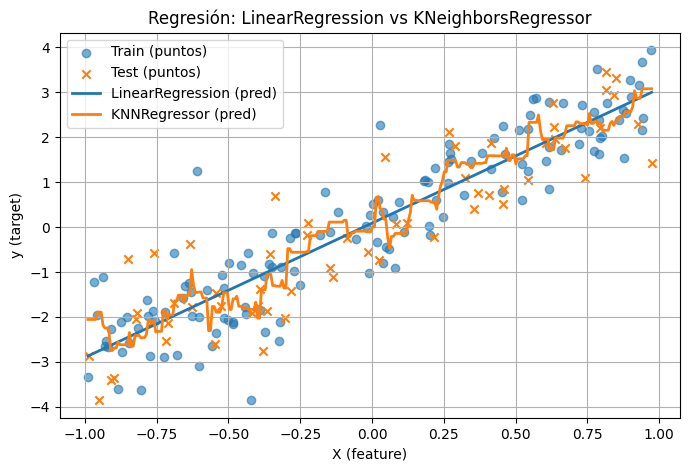

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(Xr_train, yr_train, label="Train (puntos)", alpha=0.6)
plt.scatter(Xr_test, yr_test, label="Test (puntos)", marker='x')
plt.plot(X_grid, y_grid_lr, label="LinearRegression (pred)", linewidth=2)
plt.plot(X_grid, y_grid_knn, label="KNNRegressor (pred)", linewidth=2)
plt.xlabel("X (feature)")
plt.ylabel("y (target)")
plt.title("Regresión: LinearRegression vs KNeighborsRegressor")
plt.legend()
plt.grid(True)
plt.show()


K VECINOS VS REGRESION LOGISTICA

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [16]:
#Generamos  un dataset sintético con 2 características (esto facilita graficar la frontera de decisión).

#flip_y=0.08 introduce algo de ruido en las etiquetas (8% de ejemplos con etiqueta cambiada).

X_clf, y_clf = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1, flip_y=0.08, random_state=1)


In [17]:
#Division

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)


In [18]:

#Instanciamos regresión logística (referencia) y KNN clasificador (k=5).

logreg = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=5)


In [19]:
#Entrenamiento

logreg.fit(Xc_train, yc_train)
knn_clf.fit(Xc_train, yc_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
#Predicciones

yc_pred_log = logreg.predict(Xc_test)
yc_pred_knn = knn_clf.predict(Xc_test)


In [21]:
#Metricas

acc_log = accuracy_score(yc_test, yc_pred_log)
acc_knn = accuracy_score(yc_test, yc_pred_knn)
cm_log = confusion_matrix(yc_test, yc_pred_log)
cm_knn = confusion_matrix(yc_test, yc_pred_knn)


In [22]:
%matplotlib inline


In [24]:
#Graficos

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


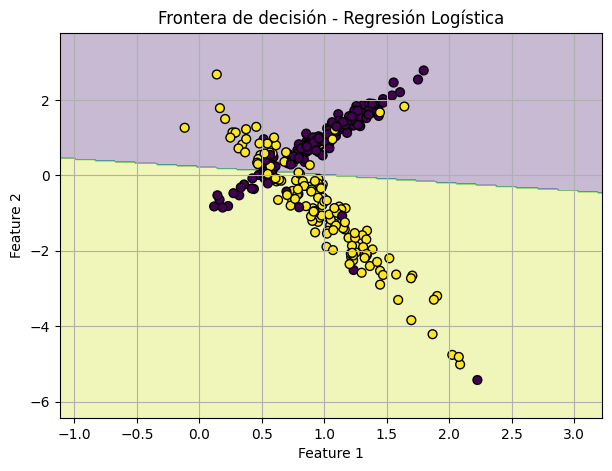

In [25]:
plot_decision_boundary(logreg, X_clf, y_clf, "Frontera de decisión - Regresión Logística")


In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_clf, y_clf)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


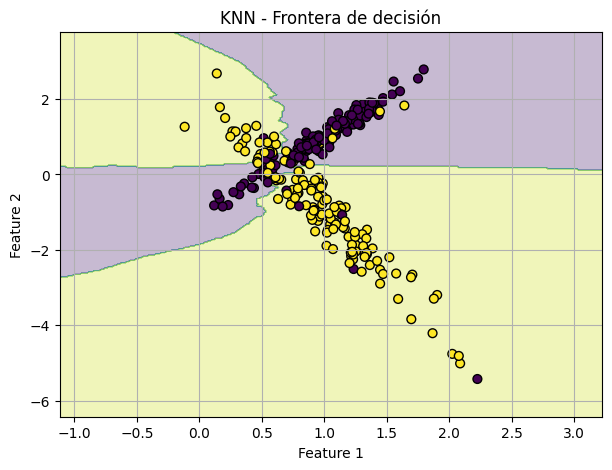

In [27]:
plot_decision_boundary(knn_clf, X_clf, y_clf, "KNN - Frontera de decisión")
